<a href="https://colab.research.google.com/github/pavithra-g1927/Bank-Customer-Churn-Model/blob/main/BankChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK CUSTOMER CHURN MODEL**
- A real world problem on how to identify the bank customers who are going to leave the bank or left the bank.

Learning Objectives:
1. Data Encoding
2. Feature Encoding
3. Handling Inbalance Data
      * Random Under Sampling
      * Random Over Sampling
4. Support Vector Machine Classifier
5. Grid Search for Hyperparameter Tunning






Step1: **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step2: **Import Data**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

Step3: **Analyze Data**

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

np.int64(0)

In [ ]:
df=df.set_index('CustomerId') #setting CustomerId as index

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

<ipython-input-13-1985855611>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

<ipython-input-15-1828585573>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)


In [ ]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [ ]:
df.replace({'Num of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [ ]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [ ]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

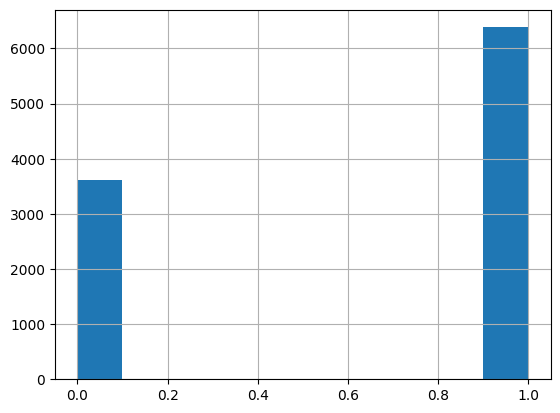

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn','Geogra'])

Modelling Part - To create the modeling part, first we need to extarct our feature or define our features or attributes or independent variable and to define our dependent variable or y or a label or a target.
So we draw surnameand churn - surname has no predictive power it's a name so we are dropping a surname and churn which is our label or y-variable from the dataframe using the function .drop(), x==1 because the surname and churn are the label of column and x==1 is a column axis and defining our x and y, we are defining as a churn. so the shape of our x and y are 10,000 rows and 11 columns are there!..

Step4: **Define Label and Features**

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
X=df.drop(['Surname','Churn'],axis=1)

In [ ]:
Y=df['Churn']

In [ ]:
X.shape,Y.shape

((10000, 11), (10000,))

**IMBALANCE DATA**
1. The no.of customers left who left the bank are less than those who stayed.
2. In Fraud Detction - The no.of spam mails are less than those of regular mails.
3. In Disease Prediction - The people suffering with disesase is always small than the people healthy
4. Online Sales Channel - The people who are leaving are less than the people who are buying.
5. Advertising Clicks - The count or people who are clicking on advertisement are few than the people who are not clicking on the advertisement.
- We are finding that the category or the label of our two classes are imbalance , so how to deal such situations??!
 - Either we can run the model with whatever data we have, but it will not give us a good accuracy because our model will not be to learn from the category which is few in number

So to overcome with undersamoling or imbalanced data we deal with two stratergy which are 1. Under Sampling and 2. Over Sampling


**UnderSampling** can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when we have a ton of data - think of million rows.But a drawback to undersampling is that we are removing random records from the majority class, which can cause loss of information.

A drawback to consider when undersampling is that it can cause overfitting and poor generalization to our test data.


---

**OverSampling ** can be defined as adding more copies to the minority class. Oversampling can a good choice when you don't have a to of data to work with.

The simplest implementation of over-sampling is to duplicte random records from the minority class, which can cause overfitting.






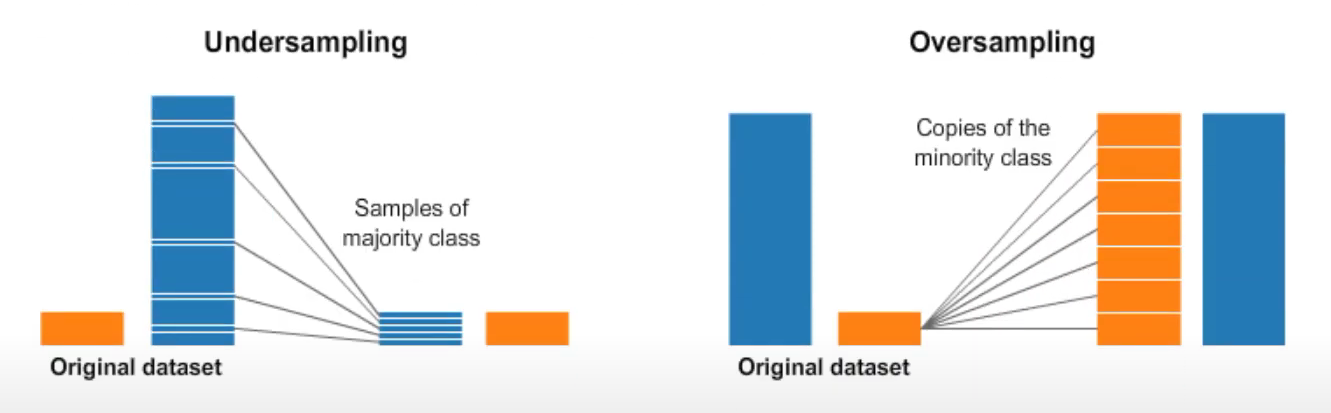

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


<Axes: xlabel='Churn', ylabel='count'>

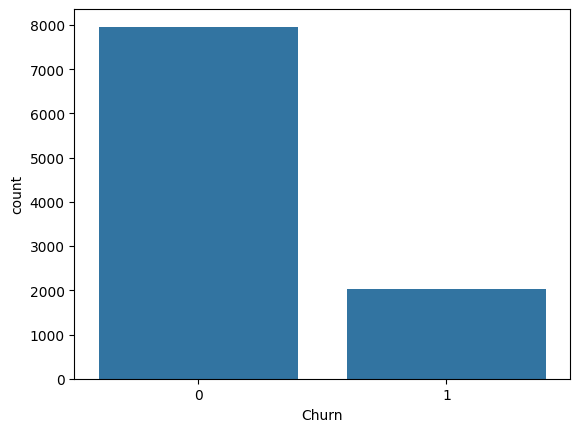

In [ ]:
sns.countplot(x='Churn',data=df)

In [ ]:
X.shape,Y.shape

((10000, 11), (10000,))

**Random UnderSampling**


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=2529)

In [ ]:
X_rus,Y_rus = rus.fit_resample(X,Y)

In [ ]:
X_rus.shape,Y_rus.shape

((4074, 11), (4074,))

In [ ]:
Y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
Y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

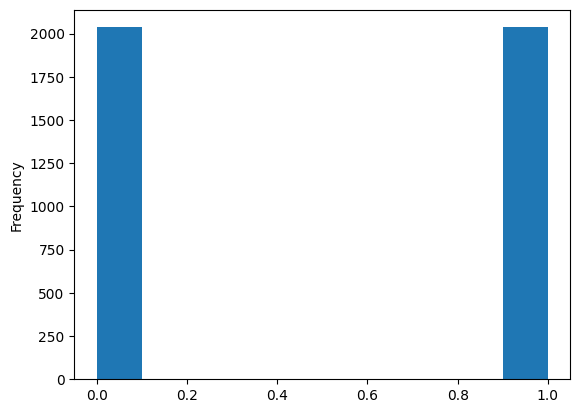

In [ ]:
Y_rus.plot(kind="hist")

**Random OverSampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=2529)

In [ ]:
X_ros,Y_ros = ros.fit_resample(X,Y)

In [ ]:
X_ros.shape,Y_ros.shape

((15926, 11), (15926,))

In [ ]:
Y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
Y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: ylabel='Frequency'>

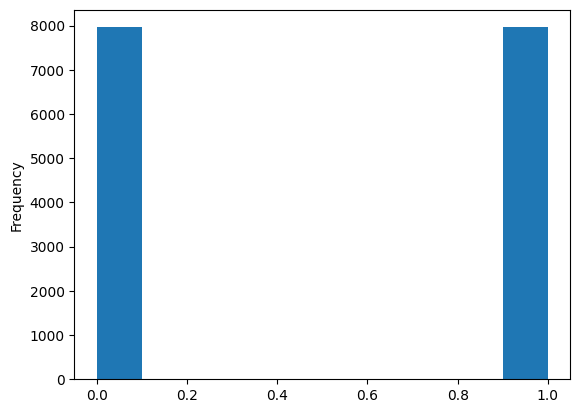

In [ ]:
Y_ros.plot(kind="hist")

Now we have 3 datasets with us -
1. Raw dataset - which is our original
2. Random UnderSample dataset
3. Random OverSample dataset

Now we want to run the Support Vector Machine on all these three datasets and compare the accuracy that which stratergy works better.

So we Train Test Split each dataset by using function train_test_split

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
# Split Original Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=25)
#Split Random UnderSample data
X_train_rus,X_test_rus,Y_train_rus,Y_test_rus=train_test_split(X_rus,Y_rus,test_size=0.3,random_state=25)
#Split Random OverSample data
X_train_ros,X_test_ros,Y_train_ros,Y_test_ros=train_test_split(X_ros,Y_ros,test_size=0.3,random_state=25)

Now our credit-score,age,balance,salary,tenure - have a different scale, so we need to preprocess our data with standard scalar or by standardizing our dataset so we use standard scalar on our split data set.

It is best practice to split the dataset first and then use standard scalar or min-max scalar.

we seperately apply standard scalar on train dataset and test dataset

**Standardize Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#Standardize Original data
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
#Standardize Random UnderSample data
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
#Standardize Random OverSample data
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


**Support Vector Machine Classifier**

- **ON ORIGINAL OR RAWDATA**

In [ ]:
from sklearn.svm import SVC
svc=SVC()
#fitting and prediction with raw dataset
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)

**Model Accuracy**


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[2378,   41],
       [ 376,  205]])

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2419
           1       0.83      0.35      0.50       581

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



The overall accuracy seems to be good, but there are issues in the classifiaction!

Our category of interest is to find out the people who are leaving the bank i.e the people who are churning the bank.

Here though overall accuracy is very high the recall of the category of interest is just 35%!.. So we will see that our model is not good in predicting the churning though it is overall able to predict good  why?? - because of inbalanced data - The people who are not leaving are in great amount so, even if say for example as a thumb rule i start predicting everyone belonging to zero category even then my model may have accuracy in the range of 70 percent if  just by blindfolded i start tagging everyone as not leaving not leaving even in that case my model will be giving 70% accuracy but if this model is not for what we aspire.


so let's try **hyperparameter tuning** on raw data or original data to see whether there is some improvement possible without treating for imbalance.




**HyperParameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [ ]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
confusion_matrix(Y_test,grid_predictions)

array([[2203,  216],
       [ 362,  219]])

In [ ]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2419
           1       0.50      0.38      0.43       581

    accuracy                           0.81      3000
   macro avg       0.68      0.64      0.66      3000
weighted avg       0.79      0.81      0.80      3000



Here the overall accuracy has come down from 86 to 81 % but still we see this model is better than the previous one why?? - because now atleast it is better in Predicting the people who are churning or leaving the bank - 38%. This is better than the previous but still not a good model!

- **ON RANDOM UNDERSAMPLING**

In [ ]:
svc_rus=SVC()
#fitting and prediction with raw dataset
svc_rus.fit(X_train_rus,Y_train_rus)
y_pred_rus = svc.predict(X_test_rus)

**Model Accuracy**

In [ ]:
confusion_matrix(Y_test_rus,y_pred_rus)


array([[598,   5],
       [429, 191]])

In [ ]:
print(classification_report(Y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73       603
           1       0.97      0.31      0.47       620

    accuracy                           0.65      1223
   macro avg       0.78      0.65      0.60      1223
weighted avg       0.78      0.65      0.60      1223



**HyperParameter Tuning**

In [ ]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [ ]:
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,Y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)


SVC(C=10, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_rus = grid_rus.predict(X_test_rus)


In [ ]:
confusion_matrix(Y_test_rus,grid_predictions_rus)

array([[477, 126],
       [155, 465]])

In [ ]:
print(classification_report(Y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       603
           1       0.79      0.75      0.77       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



- **ON RANDOM OVERSAMPLING DATA**

In [ ]:
svc_ros=SVC()
#fitting and prediction with raw dataset
svc_ros.fit(X_train_ros,Y_train_ros)
y_pred_ros = svc_ros.predict(X_test_ros)

confusion_matrix(Y_test_ros,y_pred_ros)
print(classification_report(Y_test_ros,y_pred_ros))
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,Y_train_ros)

print(grid_ros.best_estimator_)
grid_predictions_ros = grid_ros.predict(X_test_ros)
confusion_matrix(Y_test_ros,grid_predictions_ros)
print(classification_report(Y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49      2426
           1       0.55      0.76      0.64      2352

    accuracy                           0.58      4778
   macro avg       0.59      0.58      0.56      4778
weighted avg       0.59      0.58      0.56      4778

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ....C=1, class_weight=balanced, gam

Let's Compare!!

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2419
           1       0.83      0.35      0.50       581

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



In [ ]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2419
           1       0.50      0.38      0.43       581

    accuracy                           0.81      3000
   macro avg       0.68      0.64      0.66      3000
weighted avg       0.79      0.81      0.80      3000



In [ ]:
print(classification_report(Y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73       603
           1       0.97      0.31      0.47       620

    accuracy                           0.65      1223
   macro avg       0.78      0.65      0.60      1223
weighted avg       0.78      0.65      0.60      1223



In [ ]:
print(classification_report(Y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       603
           1       0.79      0.75      0.77       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



In [ ]:
print(classification_report(Y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49      2426
           1       0.55      0.76      0.64      2352

    accuracy                           0.58      4778
   macro avg       0.59      0.58      0.56      4778
weighted avg       0.59      0.58      0.56      4778



In [ ]:
print(classification_report(Y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2426
           1       1.00      0.94      0.97      2352

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778

